# Practical Python – Error Handling,Logging, and Data Manipulation|Assignment


# 1. What is the difference between multithreading and multiprocessing?

Answer:

Multiprocessing uses multiple independent processes, each with its own memory space and a dedicated CPU core, allowing for true parallelism. It is best suited for CPU-bound tasks, such as computationally intensive operations. Process creation has a higher overhead than thread creation.


Multithreading involves multiple threads within a single process that share the same memory space. In Python, due to the Global Interpreter Lock (GIL), multithreading achieves concurrency (tasks appear to run at the same time but are interleaved) rather than true parallelism. It is ideal for I/O-bound tasks where one thread can execute while another is waiting for I/O operations to complete, improving responsiveness.


# 2. What are the challenges associated with memory management in Python?


Answer:

Some challenges associated with Python's memory management include:

* Memory Leaks: Although Python has automatic garbage collection, memory leaks can occur, particularly due to circular references that are not properly collected or references unintentionally maintained in global scopes.

* Performance Overhead: There is runtime overhead related to the garbage collection process itself.

* Poor Memory Efficiency: Python can use a significant amount of memory compared to other languages due to its dynamic typing and the general-purpose nature of its objects, which can cause performance bottlenecks or increased memory usage in long-running applications.

* Memory Fragmentation: Free memory can become divided into small, non-contiguous blocks, leading to inefficient usage and slow allocation times, especially for long-running applications.


* Limited Developer Control: Developers have less fine-grained control over memory allocation and deallocation compared to languages like C or C++.


# 3. Write a Python program that logs an error message to a log file when a division by zero exception occurs.

In [ ]:
import logging

def divide_numbers(numerator, denominator):
    # Configure logging to write error messages to 'error.log'
    logging.basicConfig(filename='error.log', level=logging.ERROR, format='%(asctime)s:%(levelname)s:%(message)s')

    try:
        result = numerator / denominator
        print(f"The result is: {result}")
    except ZeroDivisionError as e:
        error_message = f"Error: Cannot divide by zero. Details: {e}"
        # Log the error message to the log file
        logging.error(error_message)
        print(error_message)

# Example usage causing the exception:
divide_numbers(10, 0)

# To verify the log file content, you could read it after running:
# with open('error.log', 'r') as f:
#     print(f.read())


ERROR:root:Error: Cannot divide by zero. Details: division by zero


Error: Cannot divide by zero. Details: division by zero


# 4. Write a Python program that reads from one file and writes its content to another file.

In [ ]:
def copy_file_contents(source_file, destination_file):
    try:
        # Open the source file in read mode ('r') and the destination in write mode ('w')
        with open(source_file, 'r') as file1, open(destination_file, 'w') as file2:
            # Read all content from file1 and write it to file2
            file2.write(file1.read())
        print(f"Successfully copied contents from '{source_file}' to '{destination_file}'.")
    except FileNotFoundError:
        print(f"Error: The file '{source_file}' was not found.")

# Example usage:
# First, create a dummy source file for testing (optional)
with open('file1.txt', 'w') as f:
    f.write("Hello, this is the source file content.")

copy_file_contents('file1.txt', 'file2.txt')


Successfully copied contents from 'file1.txt' to 'file2.txt'.


# 5. Write a program that handles both IndexError and KeyError using a try-except block.


In [ ]:
def handle_errors(data_list, data_dict, index_key, dict_key):
    try:
        # Attempt to access data from the list
        list_value = data_list[index_key]
        print(f"Accessed list value: {list_value}")

        # Attempt to access data from the dictionary
        dict_value = data_dict[dict_key]
        print(f"Accessed dictionary value: {dict_value}")

    except (IndexError, KeyError) as e:
        # This block catches either IndexError or KeyError
        print(f"An error occurred: {e}")
        print("Please check the list index or dictionary key you are trying to access.")

# Example usage:
my_list = [10, 20, 30]
my_dict = {'a': 1, 'b': 2}

# This will raise a KeyError (my_dict has no key 'c')
handle_errors(my_list, my_dict, 1, 'c')

print("-" * 20)

# This will raise an IndexError (my_list has no index 10)
handle_errors(my_list, my_dict, 10, 'a')


Accessed list value: 20
An error occurred: 'c'
Please check the list index or dictionary key you are trying to access.
--------------------
An error occurred: list index out of range
Please check the list index or dictionary key you are trying to access.


# 6. What are the differences between NumPy arrays and Python lists?


Answer:

| Feature                 | NumPy Array                    | Python List     |
| ----------------------- | ------------------------------ | --------------- |
| Performance             | Faster                         | Slower          |
| Memory Usage            | Less                           | More            |
| Data Type               | Homogeneous                    | Heterogeneous   |
| Mathematical Operations | Built-in vectorized operations | Requires loops  |
| Use Case                | Numerical computing            | General-purpose |


# 7. Explain the difference between apply() and map() in Pandas.


Answer:

* map(): This method is strictly defined on a Pandas Series (like a single column of a DataFrame). It is used for element-wise transformations or mapping existing values to new ones using a function, dictionary, or another Series.

* apply(): This method is defined on both Series and DataFrames.

> When used on a Series, it operates element-wise like map().

> When used on a DataFrame, it operates along an axis (either row-wise or column-wise) and can apply functions that cannot be vectorized, or perform aggregations, working with the whole row or column as input.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 8. Create a histogram using Seaborn to visualize a distribution.


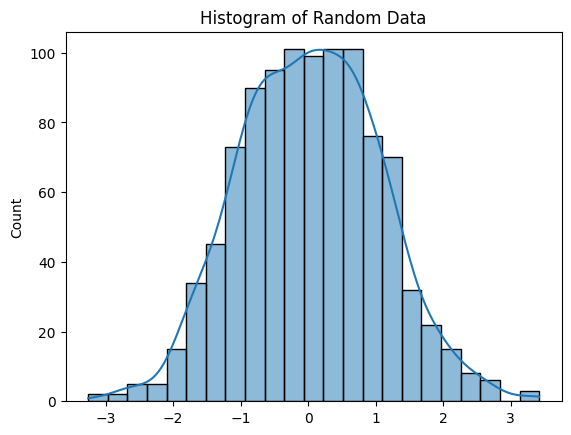

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = np.random.randn(1000)

sns.histplot(data, kde=True)
plt.title("Histogram of Random Data")
plt.show()

# 9. Use Pandas to load a CSV file and display its first 5 rows.


In [13]:
import pandas as pd

df = pd.read_csv("/people_data.csv")

In [14]:
df

,First Name,Last Name,Sex,Email,Date of birth,Job Title
0,Shelby,Terrell,Male,elijah57@example.net,1945-10-26,Games developer
1,Phillip,Summers,Female,bethany14@example.com,1910-03-24,Phytotherapist
2,Kristine,Travis,Male,bthompson@example.com,1992-07-02,Homeopath
3,Yesenia,Martinez,Male,kaitlinkaiser@example.com,2017-08-03,Market researcher
4,Lori,Todd,Male,buchananmanuel@example.net,1938-12-01,Veterinary surgeon


# 10. Calculate the correlation matrix using Seaborn and visualize it with a heatmap.


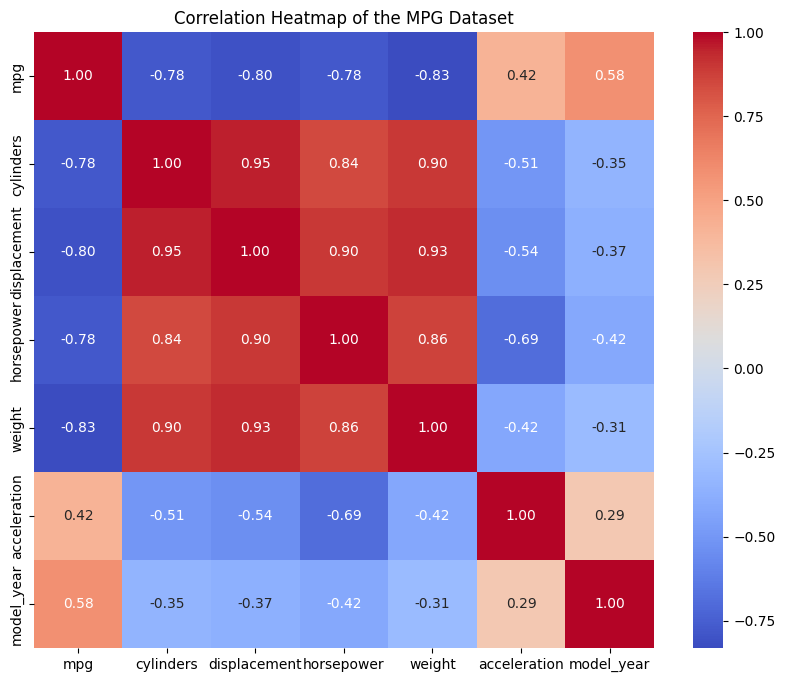

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset provided by Seaborn for demonstration (e.g., 'mpg' dataset)
df = sns.load_dataset('mpg')

# Calculate the correlation matrix for all numeric columns
# The .corr() method computes the correlation between numerical variables
corr_matrix = df.select_dtypes('number').corr()

# Plot the heatmap using Seaborn's heatmap function
plt.figure(figsize=(10, 8)) # Optional: Adjust the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") # annot=True to show correlation values

# Add a title and display the plot
plt.title('Correlation Heatmap of the MPG Dataset')
plt.show()
